<a href="https://colab.research.google.com/github/popcornjose/hello-world/blob/master/ControlEng_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#制御モデル

##動的システムと静的システム

シャープペンで、ノックをする（出力）とカチッと音がする（出力）は、

現在のノックのみにより決まり、過去のノックには影響されない。

これは静的システムであり、ノックにより芯がどれだけ出ているかは、

過去にどれだけノックしたかによってきまるので、動的システムである。

これを数式で表すと、時刻 $k$ での入力を $u_k$ 、出力を $y_k$ とすると、

$u_k=1$ のときはノックする。$u_k=0$ のときはノックをしない。とすると、

静的システムでは $u_k$ のみで $y_k$ が決まるので、$y_k=u_k$ となる。

一方、動的システムの場合は、$y_k=y_{k-1}+u_k$ となり、１時刻前の芯の長さに

ノックをするかしないかの $u_k$ を足し合わせることで、現在の芯の長さ $y_k$ になる。

また $y_k$ は、

$y_k=u_k+u_{k-1}+\cdots+u_0+y_0$ のように書くこともできる。

つまり、入力を $u$ 、出力を $y$ とする動的システムの一般系において、時刻 $t$ における

出力 $y(t)$ が時刻 $t$ までの入力と出力で決まるとするとき、このシステムは次の

微分方程式で記述される。

$
\frac{d^n}{dt^n}y(t)+a_{n-1}\frac{d^{n-1}}{dt^{n-1}}y(t)+\cdots+a_1\frac{d}{dt}y(t)+a_0y(t)
$

$$
=b_m\frac{d^m}{dt^m}u(t)+b_{m-1}\frac{d^{m-1}}{dt^{m-1}}u(t)+\cdots+b_1\frac{d}{dt}u(t)+b_0u(t)\hspace{15pt}・・・・・（３．１）
$$

ちなみに、時刻t の出力が時刻 t の入力 u(t)のみで決まる場合は、

静的システム　$y(t)=b_0u(t)$  となる。

##台車モデル

台車の質量をM、位置を $z(t)$ 外力の総和を $F(t)$ とすると、運動方程式は

$$
M\ddot{z}(t)=F(t)
$$

となる。

ここで、$\dot{z},\ddot{z}$ はそれぞれ速度、加速度であり、台車にかかる外力は、

力 $f(t)$ と粘性摩擦力 $-\mu\dot{z}(t)$ で、外力の総和は $F(t)=f(t)-\mu\dot{z}(t)$ となる。

したがって、台車の運動方程式は、

$$
M\ddot{z}(t)+\mu\dot{z}(t)=f(t)\hspace{15pt}・・・・・（３．2）
$$


そして、出力を速度 $y(t)=\dot{z}$、入力を力 $u(t)=f(t)$ とすると、

$$
M\dot{y}(t)+\mu y(t)=u(t)\hspace{15pt}・・・・・（３．3）
$$

となる。

##垂直駆動アームのモデル

アームの回転軸まわりの慣性モーメントをJ、質量をM、そして、重力加速度をｇとしたとき、

アームの角度を $\theta(t)$ 、アームに加わる外トルクの総和を $T(t)$ とすると、運動方程式は、

$$
J\ddot{\theta}(t)=T(t)
$$

となる。

外トルクは、トルク $\tau(t)$ と粘性摩擦力により生じるトルク $-\mu\dot{\theta}(t)$ 、

そして、重力により生じるトルク $-Mgl\sin\theta(t)$ であるので、

外トルクの総和は、$T(t)=\tau(t)-\mu\dot{\theta}(t)-Mgl\sin\theta(t)$ 

従って、アームの運動方程式は

$$
J\ddot{\theta}(t)+\mu\dot{\theta}(t)+Mgl\sin\theta=\tau(t)\hspace{15pt}・・・・・（３．4）
$$

となる。出力を $y(t)=\theta(t)$ 、入力を $u(t)=\tau(t)$ とすると、

$$
J\ddot{y}(t)+\mu\dot{y}(t)+Mgl\sin{y}(t)=u(t)\hspace{15pt}・・・・・（３．5）
$$

しかし、この式には$\sin{y}(t)$ の非線形要素が含まれていて、式（３．１）の線形な微分方程式では表せない。

このような場合、例えばアームが $y(t)=0$ の近傍で動くと仮定してモデルを作る。

これを、**近似線形化**という。

$\sin{y}(t)$ は $y(t)=0$ の近傍では、 $y(t)$ のみとみなすことができる。

（$\omega=\sin{y}$ のグラフで$y=0$　の点で接線を描くと、それは$\omega=y$の直線になる）

そこで、式（３．５）で$\sin{y}(t)=y(t)$ とすると線形な微分方程式

$$
J\ddot{y}(t)+\mu\dot{y}(t)+Mgly(t)=u(t)\hspace{15pt}・・・・・（３．6）
$$

が得られる。

##RCL回路モデル

抵抗R,コンデンサC、コイルLから構成されるRCL回路を考える。この回路に印加する電圧を $v_{in}(t)$ 、

回路に流れる電流を $i(t)$ 、コンデンサの両端の電圧を $v_[out](t)$ 、とする。

そして、コイルのインダクタンスをL,抵抗器の抵抗をR、コンデンサのキャパシタンスをCとすると、

オームの法則により、

$$
v_{in}(t)=L\frac{d}{dt}i(t)+Ri(t)+\frac{1}{C}\int_0^ti(\tau)d\tau\hspace{15pt}・・・・・（３．7）
$$

ここで出力を

$$
y(t)=v_{out}(t)=\frac{1}{C}\int_0^ti(\tau)d\tau
$$

入力を

$$
u(t)=v_{in}(t)
$$

、$C\dot{y}(t)=i(t)$ なので、

$$
LC\ddot{y}(t)+RC\dot{y}(t)+y(t)=v(t)\hspace{15pt}・・・・・（３．８）
$$

となる。

##増幅回路のモデル

オペアンプを用いた増幅回路で、入力電圧を$v_{in}(t)$、出力電圧を $v_{out}(t)$ とし、２つの抵抗器の抵抗を

$R_1, R_2$　、コンデンサのキャパシタンスをCとすると、オペアンプの２つの入力の電位差が０となる。

（operational amplifierにおけるvirtual short）オペアンプの２つの入力が短絡し、

上側の入力がGNDと接していると考えられる。

このとき、オームの法則とキルヒホッフの法則を用いて、

$R_1$に流れる電流は、

$$
i_1(t)=\frac{v_{in}(t)}{R_1}
$$

$R_2$に流れる電流は、

$$
i_2(t)=\frac{v_{in}(t)}{R_2}
$$

そして、Cに流れる電流$i_3$と出力電圧の関係は、

$$
v_{out}(t)=\frac{1}{C}\int i_3(t)dt
$$

つまり、

$$
\dot{v}_{out}(t)=\frac{1}{C}i_3(t)
$$

これらと、$i_1(t)+i_2(t)+i_3(t)=0$ の関係より、

$$
\frac{v_{in}(t)}{R_1}+\frac{v_{out}(t)}{R_2}+C\dot{v}_{out}(t)=0\hspace{15pt}・・・・・（３．９）
$$

従って、出力を$y(t)=v_{out}(t)$、入力を $u(t)=v_{int}(t)$ とすると、

$$
R_1R_2C\dot{y}(t)+R_1y(t)=-R_2u(t)\hspace{15pt}・・・・・（３．10）
$$

となる。

## 伝達関数モデル

伝達関数モデルは、微分方程式の両辺を初期値を０としてラプラス変換することで得られる。

例えば、時間の関数をｓの関数（複素関数）におきかえて、さらに、微分記号をｓに、積分記号を$\frac{1}{s}$

に置き換えることで、ｓの多項式を作る。つまり、

\begin{cases}
  y(t) & \to y(s)  \\
  \dot{y}(t) & \to sy(s)  \\
  \frac{d^n}{dt^n}y(t) & \to s^ny(s) \\
  \int ydt & \to \frac{1}{s}y(s)\\
  \int\int\cdots\int y(dt)^n & \to \frac{1}{s^n}y(s)
 \end{cases}

という感じで、時間領域で微分する操作は、ｓ領域においてｓを掛ける操作になる。

時間領域で積分するする操作は、ｓ領域においてｓで割る操作になる。

このことから、前出の動的システムの微分方程式（３．１）は次のように伝達関数モデルが構築される。

$\displaystyle
\frac{d^n}{dt^n}y(t)+a_{n-1}\frac{d^{n-1}}{dt^{n-1}}y(t)+\cdots+a_1\frac{d}{dt}y(t)+a_0y(t)
$

$$
=b_m\frac{d^m}{dt^m}u(t)+b_{m-1}\frac{d^{m-1}}{dt^{m-1}}u(t)+\cdots+b_1\frac{d}{dt}u(t)+b_0u(t)\hspace{15pt}・・・・・（３．１）
$$

伝達関数モデル表現

$$
\mathcal{P}(s)=\frac{y(s)}{u(s)}=\frac
{b_ms^m+b_{m-1}s^{m-1}+\cdots+b_1s+b_0}{s^n+a_{n-1}s^{n-1}+\cdots+a_1s+a_0}
\hspace{15pt}・・・・・（３．１2）
$$

ただし、$y(s)=\mathcal{L}[y(t)], u(s)=\mathcal{L}[u(t)]$ で、$\mathcal{L}$ はラプラス変換を表している。

伝達関数モデルはシステムの入力 u と出力 y の関係を表すもので、システム$\mathcal{P}(s)$の出力は

$y(s)=\mathcal{P}(s)u(s)$ となる。


##ラプラス変換

関数$g(t)$ のラプラス変換は、

$$
g(s)=\mathcal{L}[g(t)]:=\int_0^\infty g(\tau)e^{-s\tau}d\tau\hspace{15pt}\cdots(3.13)
$$

と定義される。

ここで s は複素数であり、2 つの実数 σ, ω を用いて s = σ + iω と表すことができる（i は虚数単位）

右辺の積分はラプラス積分 (Laplace integral) と呼ばれる。これは時間領域から複素平面への写像である。

ラプラス変換は、関数 $f(t)$ に、いったん $e^{-\sigma t}\theta(t)$ を乗じてからフーリエ変換する操作

であると考えることが出来る。ここで、 $s=\sigma+i\omega$、 $\theta(t)$ はステップ関数である。

$$
F(s):=F(\sigma,\omega)=\int_{-\infty}^\infty\theta(t)f(t)e^{-\sigma t}e^{-i\omega t}dt=\int_0^\infty f(t)e^{-st}dt
$$


一階の導関数をラプラス変換すると

$$\displaystyle
    \begin{array}{rl}
      \mathcal{L}|\dot{y}(t)=& \int_0^\infty\dot{y}(\tau)e^{-s\tau}d\tau \\
       =& [y(\tau)e^{-s\tau}]_0^\infty - \int_0^\infty -sy(\tau)e^{-s\tau}d\tau \\
      = & [y(\tau)e^{-s\tau}]_0^\infty +s \int_0^\infty y(\tau)e^{-s\tau}d\tau \\
      =& sy(s)-y(0)\hspace{65pt}\cdots(3.14)
    \end{array}
  $$
  
  となり、初期値が $y(0)=0$ のとき、$\dot{y}(t)$ のラプラス変換は $sy(s)$ となる。
  
  同様に、二階導関数の場合は $y (0)$ に加え、t = 0 における微分係数 $\dot{y}(0)$ が現れる。
  
  $$
  \mathcal{L}|\ddot{y}(t)=s^2y(s)-sf(0)-\dot{y}(0)
  $$
  
  これを繰り返すと、一般のｎ階の導関数のラプラス変換は以下のようになる。
  
  $$
  \displaystyle
  \begin{array}{rl}
  \mathcal{L}\left[\frac{d^n f(t)}{dt^n}\right]=&s^nF(s)-\sum_{k=0}^{n-1}s^{n-k-1}f^{(k)}(0)\\
  =&s^nF(s)-s^{n-1}f(0)-s^{n-2}f^{(1)}(0)-s^{n-3}f^{(2)}(0)-\dots-f^{n-1}(0)
  \end{array}
  \\
  $$
  
 次に、 $y(t)$ の時間積分、
  $\displaystyle
  f(t)=\int_0^t y(\tau)d\tau\hspace{25pt}\cdots(3.15)
  $
  
  をラプラス変換すると、
  
  $\dot{f}(t)=y(t)$ であるので、この左辺をラプラス変換すると、
  
  $$
  \mathcal{L}[\dot{f}(t)]=sf(s)-f(0)=sf(s)-\int_0^0y(\tau)d\tau=sf(s)\hspace{25pt}\cdots(3.16)
  $$
  
  従って、
  
  $$
  \begin{array}{rl}
  \displaystyle
  \mathcal{L}\left[\int_0^t y(\tau)d\tau\right]=&\mathcal{L}[f(t)]\\
  =&f(s)\\
  =& \displaystyle\frac{1}{s}\mathcal{L}[\dot{f}(t)]\\
  =& \displaystyle\frac{1}{s}\mathcal{L}[y(t)]\\
  =&\displaystyle\frac{1}{s}y(s)\hspace{45pt}\cdots(3.17)
  \end{array}
  $$
  
  同様の計算で、
  
  $$
  \mathcal{L}\left[\int\int y(\tau)(d\tau)^2\right]=\frac{1}{s^2}y(s)
  $$
  
  となる。

##台車とアームの伝達関数モデル

台車の運動方程式は、

$$
M\ddot{z}(t)+\mu\dot{z}(t)=f(t)\hspace{15pt}・・・・・（３．２）
$$


そして、出力を速度 $y(t)=\dot{z}$、入力を力 $u(t)=f(t)$ とすると、

$$
M\dot{y}(t)+\mu y(t)=u(t)\hspace{15pt}・・・・・（３．３）
$$

これを、初期値を $0, (y(0)=0, \dot{y}(0)=0)$ として両辺ラプラス変換すると、

$$Msy(s)+\mu y(s)=u(s)$$

となり、整理すると、

$$(Ms+\mu)y(s)=u(s)$$

となるので、伝達関数の式に置き換えると

$$
\mathcal{P}(s)=\frac{y(s)}{u(s)}=\frac{1}{Ms+\mu}\hspace{15pt}・・・・・（３．１８）
$$

となる。

ここで、システム$\mathcal{P}(s)$は $y(s)=\mathcal{P}(s)u(s)$ となる。

---

同様に、
式（３．５）で$\sin{y}(t)=y(t)$ とすると線形な微分方程式

$$
J\ddot{y}(t)+\mu\dot{y}(t)+Mgly(t)=u(t)\hspace{15pt}・・・・・（３．６）
$$

アームの式（３．６）の両辺をラプラス変換すると、

$Js^2y(s)+\mu sy(s)+Mgly(s)=u(s)$ となり、伝達関数モデルは

$$
\mathcal{P}(s)=\frac{y(s)}{u(s)}=\frac{1}{Js^2+\mu s+Mgl}\hspace{15pt}・・・・・（３．１９）
$$

##RCL回路と増幅回路の伝達関数モデル

RCL回路の式（３．８）

$$
LC\ddot{y}(t)+RC\dot{y}(t)+y(t)=v(t)\hspace{15pt}・・・・・（３．８）
$$

をラプラス変換すると、$CLs^2y(s)+CRsy(s)+y(s)=u(s)$ となる。

これより、

$$
\mathcal{P}(s)=\frac{y(s)}{u(s)}=\frac{1}{CLs^2+CRs+1}\hspace{15pt}・・・・・（３．２０）
$$

同様に増幅回路は式（３．１０）より、

$$
R_1R_2C\dot{y}(t)+R_1y(t)=-R_2u(t)\hspace{15pt}・・・・・（３．１０）
$$

$$
R_1R_2Csy(s)+R_1y(s)=-R_2u(s)\hspace{55pt}
$$

となるので次の伝達関数が得られる。

$$
\mathcal{P}(s)=\frac{y(s)}{u(s)}=\frac{R_2}{R_1R_2Cs+R_1}\hspace{15pt}・・・・・（３．２１）
$$

##Pythonでのモデルの記述

Pythonでは、関数 tf(num, den)を使って伝達関数を記述する。例えば、以下を記述したい場合は、

$$
\mathcal{P}(s)=\frac{1}{s^2+2s+3}\hspace{15pt}・・・・・（３．２２）
$$

$
Np = [0, 1]      # 伝達関数の分子多項式の係数(0*s + 1)
Dp = [1, 2, 3]   # 伝達関数の分母多項式の係数 (1*s^2 + 2*s + 3)
P = tf(Np, Dp)
print(P)
$

この時の結果は、

$
\hspace{25pt}1\\
------\\
s^2 + 2 s +  3
$

となる。

あるいは、


P = tf([0, 1],[1, 2, 3])

としても同じ結果になる。



##状態空間モデル

伝達関数モデルは$P(s)$ で表すのに対して、状態方程式は、$P:$ で表す。

状態空間モデルは、行列表現とすることで、多元高階の微分方程式を１階の微分方程式で表現するものである。

伝達関数モデルでは入力と出力の関係を表したが、状態空間モデルでは、入力→状態→出力の関係を記述する

ことになり、状態を自由に選ぶ事ができる。（初期値も０以外のものを扱うことができる）


式（３．１）は次の状態空間モデルで表現できる。

$\mathcal{P}:
  \left\{
    \begin{array}{r r}
      \dot{x}(t) = & Ax(t)+Bu(t) \\
      y(t) = &Cx(t)+Du(t)
    \end{array}\hspace{25pt}\cdots(3.26)
  \right.
  $
  
  $\\$
  
  １つ目の式を**状態方程式**、２つ目の式を**出力方程式**と呼ぶ。
  
  ただし、$x$は状態、$u$は入力、$y$は出力であり、$A,B,C,D$ は定数行列である。
  
  また、$D$ はスカラーであるので D と書くべきである。（ちなみに、$Du$ を**直達項**という）
  
  例えば、$x$が$n$個の要素をもつ$n$次元のベクトル、$u$が$m$ 次元のベクトルの場合は、
  
  $A$ は$n\times n$ の行列、$B$ は$n\times m$ の行列となる。
  
  伝達関数では１入力、１出力を考えたが、状態空間では、$m$ 入力 $p$ 出力のシステムを表現することが出来る。

##状態方程式の導出

入力を$u$ 、出力を$y$ 、時刻$t$ における出力$y(t)$ が時刻$t$ までの入力と出力で決まるとするとき、

この動的システムの一般系の微分方程式（３．1)は、$p=\frac{d}{dt}$ とおいて、

$
　\left\{
    \begin{array}{l}
      A(p) =p^n+a_{n-1}p^{n-1}+\cdots +a_1p+a_0 \\
      B(p) =b_mp^m+b_{m-1}p^{m-1}+ \cdots + b_1p+b_0
    \end{array}\hspace{25pt}\cdots(3.28)
  \right.
  $
  
  とすると、$A(p)y = B(p)u$ と書くことができる。さらに新しい変数$v$ を導入して、
  
  $
  A(p)v = u, y=B(p)v \hspace{25pt}\cdots(3.29)
  $
  
  と分割する。そして、$n$ 次元のベクトル$x$ を
  
  $$
    x: = \left[
    \begin{array}{c}
      x_1  \\
      x_2 \\
      \vdots\\
      x_n
    \end{array}
  \right]
  =
   \left[
    \begin{array}{c}
      v \\
      pv  \\
      \vdots\\
      p^{n-1}v
    \end{array}
  \right] \hspace{25pt}\cdots(3.30)
  $$
  
  と定義すると、
  
$$
    \dot{x}=px = \left[
    \begin{array}{c}
      pv  \\
      p^2v \\
      \vdots\\
      p^nv
    \end{array}
  \right]
  =
   \left[
    \begin{array}{c}
      x_2 \\
      x_3  \\
      \vdots\\
      -a_0x_1-a_1x_2-\cdots-a_{n-1}x_n+u
    \end{array}
  \right] \hspace{25pt}\cdots(3.31)
  $$
  
  となる。また、
  
  $
  y=b_0v+b_1pv+\cdots+b_mp^mv=b_0x_1+b_1x_2+\cdots+b_mx_{m+1} \hspace{25pt}\cdots(3.32)
  $
  
  となり、以上を行列表現を用いて書き直すと、
  
  $$
  　\left\{
    \begin{array}{l}
     \dot{x}=Ax+Bu \\
      y =Cx
    \end{array}\hspace{25pt}\cdots(3.33)
  \right.
  $$
  
  ただし、$m<n$ であり、
  
  $
    A= \left[
    \begin{array}{c c c c c}
      0 &  1 &  0  & \ldots & 0  \\
     \vdots & \ddots & \ddots & \ddots & \vdots  \\
     \vdots &   & \ddots & \ddots & 0  \\
     0 & \ldots & \ldots & 0 & 1  \\
    -a_0 & -a_1 & \ldots & \ldots & a_{n-1}  
    \end{array}
  \right]
  ,\hspace{10pt} B =
   \left[
    \begin{array}{c}
      0 \\
      0  \\
      \vdots \\
      0 \\
      1
    \end{array}
  \right] \hspace{25pt}\cdots(3.34)
  $
  
  $\\$
  
  $
  C=[b_0 \ldots b_m 0 \ldots 0]\hspace{25pt}\cdots(3.35)
  $
  
  また、$m=n$ の場合は直達項$Du$ が加わる。

##台車とアームの状態空間モデル

台車の運動方程式は、

$$
M\ddot{z}(t)+\mu\dot{z}(t)=f(t)
$$

ここで、

$$
x(t)=\left[
\begin{array}{c}
z(t)\\
\dot{z}(t)
\end{array}
\right]
,\ u(t)=f(t),\ y(t)=z(t) \hspace{25pt}\cdots (3.36)
$$

とすると、状態方程式は、

$
\dot{x}(t)
=\left[
\begin{array}{c}
\dot{z}(t)\\
\ddot{z}(t)
\end{array}
\right]
=\left[
\begin{array}{c}
\dot{z}(t)\\
 -\frac{\mu}{M}\dot{z}(t)+\frac{1}{M}u(t)
\end{array}
\right]\hspace{25pt}\cdots(3.37)
\\
\hspace{20pt}
=\left[
\begin{array}{cc}
0 & 1 \\
0 & -\frac{\mu}{M}
\end{array}
\right]
\left[
\begin{array}{c}
z(t)\\
\dot{z}(t)
\end{array}
\right]
+
\left[
\begin{array}{c}
0\\
\frac{1}{M}
\end{array}
\right]u(t)\hspace{25pt}\cdots(3.38)
\\
\hspace{20pt}
=\left[
\begin{array}{cc}
0 & 1 \\
0 & -\frac{\mu}{M}
\end{array}
\right]
x(t)
+
\left[
\begin{array}{c}
0\\
\frac{1}{M}
\end{array}
\right]u(t)\hspace{25pt}\cdots(3.39)
$

となる。一方、出力方程式は、

$
y(t)=z(t)=
\left[
\begin{array}{c c}
1 & 0
\end{array}
\right]
\left[
\begin{array}{c}
z(t)\\
\dot{z}(t)
\end{array}
\right]
=\left[
\begin{array}{c c}
1 & 0
\end{array}
\right]
x(t)\hspace{25pt}\cdots(3.40)
$

つまり、$A, B, C, D$は、

$
A=\left[
\begin{array}{r c}
0 & 1\\
0 & -\frac{\mu}{M}
\end{array}
\right]
, \ 
B=\left[
\begin{array}{c}
0 \\
\frac{1}{M}
\end{array}
\right],\ 
C=\left[
\begin{array}{c c}
1 & 0
\end{array}
\right]
,\ D=0
\hspace{25pt}\cdots(3.41)
\\
$

となる。

また、アームの運動方程式は、式（３．６）で表される、

$
x(t)=\left[
\begin{array}{c}
\theta(t)\\
\dot{\theta}(t)
\end{array}
\right],\ 
u(t)=\tau(t),\ y(t)=\theta(t)\hspace{25pt}\cdots(3.42)
$

とすると、状態方程式は、

$
\dot{x}(t)=\left[
\begin{array}{c}
\dot{\theta}(t)\\
\ddot{\theta}(t)
\end{array}
\right]
=
\left[
\begin{array}{c c}
0 & 1\\
-\frac{Mgl}{J} & -\frac{\mu}{J}
\end{array}
\right]x(t)+
\left[
\begin{array}{c}
0\\
\frac{1}{J}
\end{array}
\right]u(t)\hspace{25pt}\cdots(3.43)
$

出力方程式は、

$
y(t)=\theta(t)=
\left[
\begin{array}{c c}
1 & 0
\end{array}
\right]
\left[
\begin{array}{c }
\theta(t) \\
\dot{\theta}(t)
\end{array}
\right]=
\left[
\begin{array}{c c}
1 & 0
\end{array}
\right]x(t)\hspace{25pt}\cdots(3.44)
$

つまり、$A, B, C, D $ は、

$
A=
\left[
\begin{array}{c c}
0 & 1\\
-\frac{Mgl}{J} & -\frac{\mu}{J}
\end{array}
\right],\ 
B=
\left[
\begin{array}{c}
0\\
\frac{1}{J}
\end{array}
\right],\ 
C=\left[
\begin{array}{c c}
1 & 0
\end{array}
\right],\ 
D=0\hspace{25pt}\cdots(3.45)
$

##RCL回路と増幅回路の状態空間モデル

RCL回路の回路方程式は、式（３．９）で、

$$
\frac{v_{in}(t)}{R_1}+\frac{v_{out}(t)}{R_2}+C\dot{v}_{out}(t)=0\hspace{15pt}\cdots(3.9)
$$

ここで、

$\displaystyle
x(t)=
\left[
\begin{array}{c}
\int i(\tau)d\tau\\
i(t)
\end{array}
\right],\ 
u(t)=v_{in},\ y(t)=\frac{1}{C}\int i(\tau)d\tau\hspace{25pt}\cdots(3.46)
$

とすると、状態方程式は、

$
\dot{x}(t)=
\left[
\begin{array}{c c}
0 & 1\\
-\frac{1}{LC} & -\frac{R}{L}
\end{array}
\right]x(t)+
\left[
\begin{array}{c}
0 \\
\frac{1}{L}
\end{array}
\right]u(t)\hspace{25pt}\cdots(3.47)
$

出力方程式は、

$
y(t)=\left[\begin{array}{c c}
\frac{1}{C} & 0
\end{array}\right]x(t)\hspace{25pt}\cdots(3.48)
$

つまり、$A, B, C, D$ は

$A=
\left[
\begin{array}{c c}
0 & 1\\
-\frac{1}{LC} & -\frac{R}{L}
\end{array}
\right],\ 
B=\left[
\begin{array}{c}
0 \\
\frac{1}{L}
\end{array}
\right],\ 
C=\left[\begin{array}{c c}
\frac{1}{C} & 0
\end{array}\right],\ 
D=0\hspace{25pt}\cdots(3.49)
$

増幅回路の回路方程式は、

$\displaystyle
\frac{v_{in}(t)}{R_1}+\frac{v_{out}(t)}{R_2}+C\dot{v}_{out}(t)=0\hspace{25pt}\cdots(3.50)
$

ここで、

$
x(t)=v_{out}(t),\ v(t)=v_{in}(t),\ y(t)=v_{out}(t)
$

とすると、状態方程式は、

$\displaystyle
\dot{x}(t)=\frac{1}{CR_2}x(t)-\frac{1}{CR_1}v(t)\hspace{25pt}\cdots(3.51)
$

となり、出力方程式は、$y(t)=x(t)$ となるので、

$\displaystyle
A=-\frac{1}{CR_2},\ B=-\frac{1}{CR_1},\ C=1,\ D=0
$

となる。


##ブロック線図



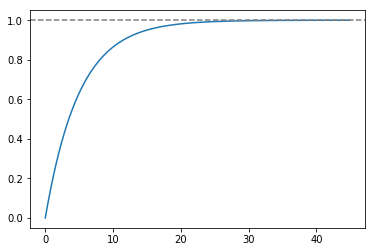

In [0]:
##その6-1. Pythonを使って制御（一次遅れ系）のプロット描画

from sympy import *
from pylab import *

# 一次遅れ系 伝達関数 G(s)=K/(T*s+1), (T>0, K>0)
K,T = symbols('K T', positive=True)
s,t = symbols('s t')
G = Lambda((s, K, T), K/(T*s+1))

# ステップ応答信号 u(t)=1  ラプラス変換
U = Lambda(s, laplace_transform(1, t, s)[0]) # U(s)=1/s

# 一次遅れ系の単位ステップ応答 y(t) はY(s)=G(s)*U(s)=K/(s*(T*s+1)) の逆ラプラス変換
ilt = inverse_laplace_transform
y = Lambda((t, K, T), ilt(G(s,K,T)*U(s), s, t))

# K=1, T=5 の場合をプロット
trange = arange(0, 45, 0.1)
plot(trange, [y(t,1,5) for t in trange])
plt.axhline(1, color="gray", linestyle="--")

show()

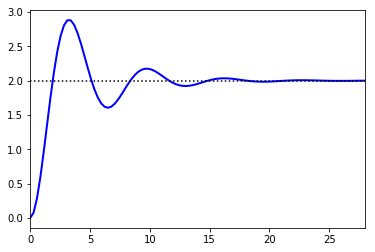

In [0]:
##その6-2. 二次遅れ系のプロット描画

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import odeint

%matplotlib inline

# tau * dy2/dt2 + 2*zeta*tau*dy/dt + y = Kp*u

Kp = 2.0    # gain
tau = 1.0   # time constant
zeta = 0.25 # damping factor
theta = 0.0 # no time delay
du = 1.0    # change in u

# Transfer Function

num = [Kp]
den = [tau**2,2*zeta*tau,1]
sys1 = signal.TransferFunction(num,den)
t1,y1 = signal.step(sys1)

plt.figure(1)
plt.plot(t1,y1*du,'b-',linewidth=2,label='Transfer Fcn')

y_ss = Kp * du

plt.plot([0,max(t1)],[y_ss,y_ss],'k:')
plt.xlim([0,max(t1)])

plt.show()